In [1]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading ACS data
usa_df = pd.read_csv("../data/raw/usa_00005-002/usa_00005-002.csv")

In [3]:
#creating a copy for manipulation
usa_df_cleaning = usa_df.copy()

In [4]:
usa_df_cleaning = usa_df_cleaning[["YEAR", "SAMPLE", "REGION", "STATEFIP", "COUNTYFIP", "HHINCOME", "SEX", "AGE", "MARST", 
                                   "RACE", "CITIZEN", "EDUC", "OCC2010", "CINETHH", "CILAPTOP", "CISMRTPHN", "CITABLET",
                                   "CIHAND", "CIHISPEED", "CISAT", "CIDIAL", "CIOTHSVC", "FAMSIZE"]]

In [5]:
#isolating years common to other data sets
usa_2011 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2011)]
usa_2013 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2013)]
usa_2015 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2015)]
usa_2017 = usa_df_cleaning[(usa_df_cleaning["YEAR"] == 2017)]

In [6]:
#staging for concatenation
usa_years = [usa_2011, usa_2013, usa_2015, usa_2017]

In [7]:
#recombining dataframes
usa_df_cleaning = pd.concat(usa_years, axis=0)

In [15]:
usa_df_cleaning.isnull().sum()

YEAR               0
SAMPLE             0
REGION             0
STATEFIP           0
COUNTYFIP          0
HHINCOME           0
SEX                0
AGE                0
MARST              0
RACE               0
CITIZEN            0
EDUC               0
OCC2010            0
CINETHH      3112017
CILAPTOP     3112017
CISMRTPHN    9391817
CITABLET     9391817
CIHAND       6302057
CIHISPEED    3112017
CISAT        3112017
CIDIAL       3112017
CIOTHSVC     3112017
FAMSIZE            0
dtype: int64

In [8]:
usa_df_cleaning.isnull().sum()/len(usa_df_cleaning)*100

YEAR          0.000000
SAMPLE        0.000000
REGION        0.000000
STATEFIP      0.000000
COUNTYFIP     0.000000
HHINCOME      0.000000
SEX           0.000000
AGE           0.000000
MARST         0.000000
RACE          0.000000
CITIZEN       0.000000
EDUC          0.000000
OCC2010       0.000000
CINETHH      24.734163
CILAPTOP     24.734163
CISMRTPHN    74.645714
CITABLET     74.645714
CIHAND       50.088449
CIHISPEED    24.734163
CISAT        24.734163
CIDIAL       24.734163
CIOTHSVC     24.734163
FAMSIZE       0.000000
dtype: float64

<p>CISMRTPHN, CITABLET showing the same degree of missingness(75%)</p>
CINETHH, CILAPTOP, CIHISPEED, CISAT, CIDIAL, CIOTHSVC showing the same degree of missingness (25%).

In [18]:
usa_df_cleaning[["CINETHH", "CILAPTOP", "CISMRTPHN", "CITABLET",
                                   "CIHAND", "CIHISPEED", "CISAT", "CIDIAL", "CIOTHSVC"]]

,CINETHH,CILAPTOP,CISMRTPHN,CITABLET,CIHAND,CIHISPEED,CISAT,CIDIAL,CIOTHSVC
3061692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3061696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
25045671,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
25045672,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
25045673,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
25045674,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0


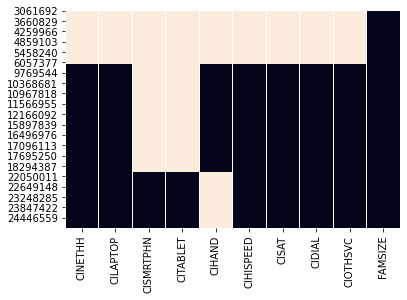

In [13]:
sns.heatmap(usa_df_cleaning[["CINETHH", "CILAPTOP", "CISMRTPHN", "CITABLET",
                                   "CIHAND", "CIHISPEED", "CISAT", "CIDIAL", "CIOTHSVC", "FAMSIZE"]].isnull(), cbar=False)

In [9]:
usa_df_cleaning.shape

(12581857, 23)

In [9]:
usa_df_cleaning.to_csv("../data/interim/usa_2011_2017_raw")